<a href="https://colab.research.google.com/github/gupta79ratnesh/PythonLabJupyterNotebooks/blob/master/StreetViewHousingNumberDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Problem Description:
Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360-degree panoramic images. The ability to
automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building
it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

# Dataset
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images

#Steps
##The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network and understand the basics of Image Classification
<ul>
<li>1) Read the data from the h5py file and understand the train/test splits (5 points)</li>
<li>2) Reshape and normalize the train and test features (10 points)</li>
<li>3) One hot encode the labels for train and test data (15 points)</li>
<li>4) Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax (15 points)</li>
<li>5) Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation (10 points)</li>
<li>6) Fit and evaluate the model. Print the loss and accuracy for the test data (5 points)</li>
</ul>

##Import Important Libraries

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf


##1) Read the data from the h5py file and understand the train/test splits

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Open the file as readonly
data1=h5py.File('/content/drive/My Drive/DeepLearning/SVHN_single_grey1.h5','r')

In [ ]:
data1.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
#Load the training, testing, and validation data
X_train=data1['X_train']
X_test=data1['X_test']
X_val=data1['X_val']
y_train=data1['y_train']
y_test=data1['y_test']
y_val=data1['y_val']

In [ ]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


#### Visualizing the dataset

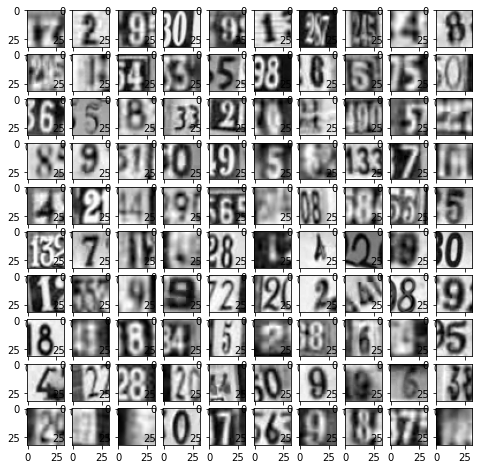

In [ ]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

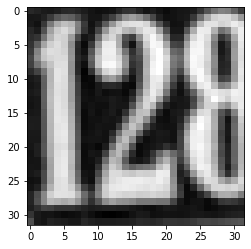

Label:  2


In [ ]:
# show the number in the dataset
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

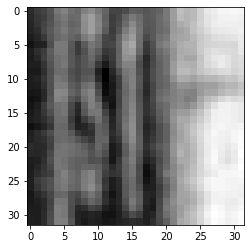

Label:  1


In [ ]:
# show the number in the dataset
plt.imshow(X_test[0],cmap='gray')    
plt.show()
print('Label: ', y_test[0])

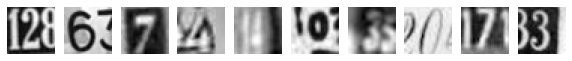

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

##2) Reshape and normalize the train and test features

In [ ]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [ ]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_train.min())

254.9745
0.0
0.9999
0.0


##3) One hot encode the labels for train and test data

In [ ]:
print(y_train[10])
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)
print(y_train[10])

1
(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Initializing the value of k and finding the accuracies on validation data
k_vals = range(1, 30, 2)
accuracies = []

for k in range(1, 30, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  score = knn.score(X_val, y_val)
  print("k value=%d, accuracy score=%.2f%%" % (k, score * 100))
  accuracies.append(score)
 
# finding the value of k which has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d value has highest accuracy of %.2f%% on validation data" % (k_vals[i],accuracies[i] * 100))

k value=1, accuracy score=83.78%
k value=3, accuracy score=62.83%
k value=5, accuracy score=62.42%
k value=7, accuracy score=61.43%
k value=9, accuracy score=60.59%
k value=11, accuracy score=60.32%
k value=13, accuracy score=59.88%
k value=15, accuracy score=59.45%
k value=17, accuracy score=59.25%
k value=19, accuracy score=59.10%
k value=21, accuracy score=58.77%
k value=23, accuracy score=58.62%
k value=25, accuracy score=58.41%
k value=27, accuracy score=58.21%
k value=29, accuracy score=58.18%
k=1 value has highest accuracy of 83.78% on validation data


* It took more than 24hrs to find the k values and accuracy of the model using 4GB RAM and intel i5 processor. 

In [ ]:
# Retraining the model using the best k value and predict the labels on test data

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

 # 4. Printing Classification Metric Report

In [ ]:
# show a final classification report demonstrating the accuracy of the classifier
print("EVALUATION ON TESTING DATA")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
[[ 935   43   51   64   71   65  185   40  170  190]
 [  51 1034  109  122  123   69   68  119   67   66]
 [  63  135  872  131   82   74   65  168   79  134]
 [  67  166  127  610   88  229   82   80  149  121]
 [  85  195   51   71 1039   55  111   35   98   72]
 [  94  103   71  220   54  588  203   48  205  182]
 [ 225   74   51   72  102  154  711   33  295  115]
 [  65  173  146  100   34   38   48 1071   53   80]
 [ 150   62   59  130   86  153  267   44  675  186]
 [ 238   87   89  115   60  113  115   65  192  730]]
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
         

* The accuracy of the model is 46%.That is not good. The digit 4 and 6 are classified correctly and achieved approx 60% accuracy.

#### Predicting the digits using KNN Classifier

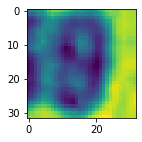

[9]


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[59].reshape(32,32))
plt.show()
image = X_test[15]
print(knn.predict(image.reshape(1, -1)))

# Implementing Deep Neural Network

In [ ]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

#### Converting output label to multiple values

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


##4) Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [ ]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

##5) Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation 

In [ ]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 1s 6ms/step - loss: 2.2852 - accuracy: 0.1412 - val_loss: 2.2565 - val_accuracy: 0.2062
Epoch 2/10
210/210 [==============================] - 1s 6ms/step - loss: 2.2280 - accuracy: 0.2136 - val_loss: 2.1841 - val_accuracy: 0.2704
Epoch 3/10
210/210 [==============================] - 1s 6ms/step - loss: 2.1376 - accuracy: 0.2695 - val_loss: 2.0681 - val_accuracy: 0.3096
Epoch 4/10
210/210 [==============================] - 1s 6ms/step - loss: 2.0122 - accuracy: 0.3181 - val_loss: 1.8978 - val_accuracy: 0.3825
Epoch 5/10
210/210 [==============================] - 1s 6ms/step - loss: 1.8832 - accuracy: 0.3541 - val_loss: 1.7454 - val_accuracy: 0.4278
Epoch 6/10
210/210 [==============================] - 1s 6ms/step - loss: 1.7625 - accuracy: 0.4007 - val_loss: 1.6885 - val_accuracy: 0.4250
Epoch 7/10
210/210 [==============================] - 1s 6ms/step - loss: 1.6694 - accuracy: 0.4379 - val_loss: 1.5658 - val_accuracy: 0.4888
Epoch 

#### Using adam optimizer  and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [ ]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 1s 7ms/step - loss: 1.7378 - accuracy: 0.4176 - val_loss: 1.3141 - val_accuracy: 0.5864
Epoch 2/10
210/210 [==============================] - 1s 6ms/step - loss: 1.3023 - accuracy: 0.5806 - val_loss: 1.1946 - val_accuracy: 0.6201
Epoch 3/10
210/210 [==============================] - 1s 6ms/step - loss: 1.1305 - accuracy: 0.6442 - val_loss: 1.0193 - val_accuracy: 0.6846
Epoch 4/10
210/210 [==============================] - 1s 6ms/step - loss: 1.0332 - accuracy: 0.6753 - val_loss: 0.9442 - val_accuracy: 0.7133
Epoch 5/10
210/210 [==============================] - 1s 6ms/step - loss: 0.9572 - accuracy: 0.7016 - val_loss: 0.9618 - val_accuracy: 0.6961
Epoch 6/10
210/210 [==============================] - 1s 6ms/step - loss: 0.9095 - accuracy: 0.7167 - val_loss: 0.9409 - val_accuracy: 0.7009
Epoch 7/10
210/210 [==============================] - 1s 6ms/step - loss: 0.8635 - accuracy: 0.7318 - val_loss: 0.8334 - val_accuracy: 0.7413
Epoch 

* The accuracy of the model is good when we are using adam optimizer comparison than sgd optimizer.

#### Now, try to change the learning rate in SGD optimizer
As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [ ]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 6ms/step - loss: 0.6445 - accuracy: 0.8011 - val_loss: 0.6500 - val_accuracy: 0.8033
Epoch 2/100
210/210 [==============================] - 1s 6ms/step - loss: 0.6206 - accuracy: 0.8100 - val_loss: 0.6424 - val_accuracy: 0.8054
Epoch 3/100
210/210 [==============================] - 1s 6ms/step - loss: 0.6139 - accuracy: 0.8123 - val_loss: 0.6376 - val_accuracy: 0.8069
Epoch 4/100
210/210 [==============================] - 1s 6ms/step - loss: 0.6095 - accuracy: 0.8132 - val_loss: 0.6339 - val_accuracy: 0.8082
Epoch 5/100
210/210 [==============================] - 1s 6ms/step - loss: 0.6063 - accuracy: 0.8147 - val_loss: 0.6309 - val_accuracy: 0.8090
Epoch 6/100
210/210 [==============================] - 1s 6ms/step - loss: 0.6037 - accuracy: 0.8154 - val_loss: 0.6289 - val_accuracy: 0.8095
Epoch 7/100
210/210 [==============================] - 1s 6ms/step - loss: 0.6015 - accuracy: 0.8156 - val_loss: 0.6276 - val_accuracy: 0.8098

* The accuracy of the model on val data using sgd with learning rate=0.0001 is improving a bit but not much.

#### Now, let's try to change the learning rate in ADAM optimizer
As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [ ]:
#Setting the learning rate  and decay in adam
adam = optimizers.Adam(lr=0.0001, decay=1e-6)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 7ms/step - loss: 0.5673 - accuracy: 0.8267 - val_loss: 0.5933 - val_accuracy: 0.8205
Epoch 2/100
210/210 [==============================] - 1s 6ms/step - loss: 0.5582 - accuracy: 0.8295 - val_loss: 0.5882 - val_accuracy: 0.8225
Epoch 3/100
210/210 [==============================] - 1s 6ms/step - loss: 0.5519 - accuracy: 0.8314 - val_loss: 0.5836 - val_accuracy: 0.8231
Epoch 4/100
210/210 [==============================] - 1s 6ms/step - loss: 0.5479 - accuracy: 0.8327 - val_loss: 0.5816 - val_accuracy: 0.8234
Epoch 5/100
210/210 [==============================] - 1s 6ms/step - loss: 0.5419 - accuracy: 0.8340 - val_loss: 0.5766 - val_accuracy: 0.8249
Epoch 6/100
210/210 [==============================] - 1s 6ms/step - loss: 0.5350 - accuracy: 0.8374 - val_loss: 0.5640 - val_accuracy: 0.8299
Epoch 7/100
210/210 [==============================] - 1s 6ms/step - loss: 0.5317 - accuracy: 0.8375 - val_loss: 0.5598 - val_accuracy: 0.8317

* The accuracy of the model on val data using ADAM with learning rate=0.0001 has shown significant improvement.

In [ ]:
results = keras_model.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', results[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3527 - accuracy: 0.9087
Val_acc using simple NN adam :  0.9087166786193848


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.908717


## Implementing batch normalization for training the neural network 

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

#### Adding Batch normalization layer 

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [ ]:
keras_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

#### Using ADAM optimizer.
* learning rate= 0.0001


In [ ]:
#Setting the learning rate  and decay in sgd
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 8ms/step - loss: 2.1157 - accuracy: 0.2678 - val_loss: 2.0740 - val_accuracy: 0.2977
Epoch 2/100
210/210 [==============================] - 2s 7ms/step - loss: 1.6002 - accuracy: 0.5031 - val_loss: 1.6358 - val_accuracy: 0.4952
Epoch 3/100
210/210 [==============================] - 2s 7ms/step - loss: 1.3198 - accuracy: 0.6236 - val_loss: 1.3814 - val_accuracy: 0.5885
Epoch 4/100
210/210 [==============================] - 1s 7ms/step - loss: 1.1229 - accuracy: 0.6890 - val_loss: 1.2530 - val_accuracy: 0.6279
Epoch 5/100
210/210 [==============================] - 2s 7ms/step - loss: 0.9822 - accuracy: 0.7270 - val_loss: 1.0798 - val_accuracy: 0.6881
Epoch 6/100
210/210 [==============================] - 2s 8ms/step - loss: 0.8708 - accuracy: 0.7573 - val_loss: 1.0402 - val_accuracy: 0.6895
Epoch 7/100
210/210 [==============================] - 2s 8ms/step - loss: 0.7891 - accuracy: 0.7769 - val_loss: 0.9450 - val_accuracy: 0.7206

In [ ]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_1[1])

1875/1875 [==============================] - 5s 2ms/step - loss: 0.7385 - accuracy: 0.8314
Val_acc using Batch ANN adam :  0.8314333558082581


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.908717
2,NN_Batch_adam,0.831433


## Implementing (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [ ]:
#Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

#### Adding Batch normalization layer  

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_2.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_2.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [ ]:
keras_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
activation_30 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
activation_31 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)              

#### Using SGD optimizer
* learning rate =0.0001


In [ ]:
#Setting the learning rate in sgd
sgd = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history_2 = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 8ms/step - loss: 2.0970 - accuracy: 0.2700 - val_loss: 2.0513 - val_accuracy: 0.3012
Epoch 2/100
210/210 [==============================] - 2s 7ms/step - loss: 1.5643 - accuracy: 0.5144 - val_loss: 1.5951 - val_accuracy: 0.5179
Epoch 3/100
210/210 [==============================] - 2s 7ms/step - loss: 1.2779 - accuracy: 0.6312 - val_loss: 1.3930 - val_accuracy: 0.5773
Epoch 4/100
210/210 [==============================] - 2s 7ms/step - loss: 1.0830 - accuracy: 0.6986 - val_loss: 1.1682 - val_accuracy: 0.6615
Epoch 5/100
210/210 [==============================] - 2s 7ms/step - loss: 0.9460 - accuracy: 0.7348 - val_loss: 1.0483 - val_accuracy: 0.6925
Epoch 6/100
210/210 [==============================] - 2s 7ms/step - loss: 0.8425 - accuracy: 0.7620 - val_loss: 1.0065 - val_accuracy: 0.7020
Epoch 7/100
210/210 [==============================] - 1s 7ms/step - loss: 0.7597 - accuracy: 0.7838 - val_loss: 0.9575 - val_accuracy: 0.7189

In [ ]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Val_acc using BatchNorm sgd : ', results_2[1])

1875/1875 [==============================] - 5s 2ms/step - loss: 0.7102 - accuracy: 0.8395
Val_acc using BatchNorm sgd :  0.8395000100135803


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_sgd'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.908717
2,NN_Batch_adam,0.831433
3,NN_Batch_sgd,0.839500


* The batch normalization using SGD optimizer is giving better results than using adam optimizer.

## Implementing batch normalization and Dropout for training the neural network 

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

#### Adding BatchNormalization Layer and Dropout Layer (0.5)

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [ ]:
keras_model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
activation_36 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
activation_37 (Activation)   (None, 256)              

#### Using ADAM optimizer.
* learning rate= 0.0001

In [ ]:
#Setting the learning rate in adam
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history_3 = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 8ms/step - loss: 2.8244 - accuracy: 0.1005 - val_loss: 2.3161 - val_accuracy: 0.1021
Epoch 2/100
210/210 [==============================] - 2s 8ms/step - loss: 2.6887 - accuracy: 0.1017 - val_loss: 2.3143 - val_accuracy: 0.1122
Epoch 3/100
210/210 [==============================] - 2s 7ms/step - loss: 2.6103 - accuracy: 0.1047 - val_loss: 2.3045 - val_accuracy: 0.1158
Epoch 4/100
210/210 [==============================] - 2s 8ms/step - loss: 2.5430 - accuracy: 0.1022 - val_loss: 2.2980 - val_accuracy: 0.1229
Epoch 5/100
210/210 [==============================] - 2s 9ms/step - loss: 2.5025 - accuracy: 0.1038 - val_loss: 2.2990 - val_accuracy: 0.1266
Epoch 6/100
210/210 [==============================] - 2s 7ms/step - loss: 2.4612 - accuracy: 0.1023 - val_loss: 2.2952 - val_accuracy: 0.1346
Epoch 7/100
210/210 [==============================] - 2s 7ms/step - loss: 2.4374 - accuracy: 0.1038 - val_loss: 2.2935 - val_accuracy: 0.1399

In [ ]:
results_3 = keras_model_3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_3[1])

1875/1875 [==============================] - 5s 3ms/step - loss: 0.8645 - accuracy: 0.7530
Val_acc using BatchNorm and Dropout adam :  0.7530166506767273


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_adam'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.908717
2,NN_Batch_adam,0.831433
3,NN_Batch_sgd,0.839500
4,NN_Batch_Drop_adam,0.753017


## Testing NN on test data 

In [ ]:
##Initialize the Artificial Neural Network Classifier
keras_model_final = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_final.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_final.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_final.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_final.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_final.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_final.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_final.add(Activation('softmax'))

In [ ]:
keras_model_final.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
activation_42 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
activation_43 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)              

In [ ]:
#Setting the learning rate in sgd
sgd = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history_final = keras_model_final.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 7ms/step - loss: 2.1202 - accuracy: 0.2538 - val_loss: 2.0773 - val_accuracy: 0.2806
Epoch 2/100
210/210 [==============================] - 1s 5ms/step - loss: 1.5677 - accuracy: 0.5241 - val_loss: 1.6177 - val_accuracy: 0.5034
Epoch 3/100
210/210 [==============================] - 1s 5ms/step - loss: 1.2815 - accuracy: 0.6372 - val_loss: 1.4017 - val_accuracy: 0.5862
Epoch 4/100
210/210 [==============================] - 1s 5ms/step - loss: 1.0915 - accuracy: 0.6982 - val_loss: 1.1897 - val_accuracy: 0.6584
Epoch 5/100
210/210 [==============================] - 1s 5ms/step - loss: 0.9527 - accuracy: 0.7341 - val_loss: 1.1907 - val_accuracy: 0.6426
Epoch 6/100
210/210 [==============================] - 1s 5ms/step - loss: 0.8470 - accuracy: 0.7628 - val_loss: 1.0457 - val_accuracy: 0.6930
Epoch 7/100
210/210 [==============================] - 1s 5ms/step - loss: 0.7674 - accuracy: 0.7828 - val_loss: 1.0337 - val_accuracy: 0.6937

In [ ]:
results_final = keras_model_final.evaluate(X_test, y_test)
print('Test accuracy : ', results_final[1])

563/563 [==============================] - 2s 3ms/step - loss: 1.4298 - accuracy: 0.7177
Test accuracy :  0.7177222371101379


#### Predicting the digits using NN classifier on test data

#### Image 1

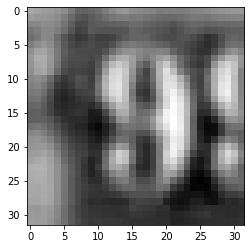

In [ ]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

In [ ]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[5]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


9

#### Image 2

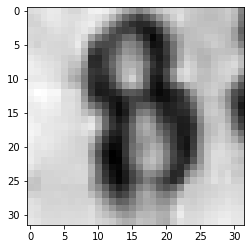

In [ ]:
#Showing the image
plt.imshow(X_test[10].reshape(32,32),cmap='gray')

In [ ]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[10]

8

#### Image 3

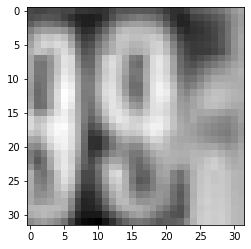

In [ ]:
#Showing the image
plt.imshow(X_test[112].reshape(32,32),cmap='gray')

In [ ]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[112]

9

In [ ]:
#Predicting for all images
y_pred=keras_model_final.predict_classes(X_test)
print(y_pred)

[7 7 2 ... 7 8 2]


# Differences and trade-offs between traditional KNN and NN classifiers with the help of classification metrics 

* KNN requires more time to find the nearest neibhours. It takes less time to train the model. It took more than 24hrs to find the best neighbour(k). However, Neural Network takes more time to train the model.
* In KNN, we have only one hyperparameter k while in NN we have so many hyperparameters(Hidden Layers, Hidden Units,learning Rate, Number of Epochs, activations Functions).
* KNN classification metrics shows that the accuracy is 46%. The digit 4 and 6 are classified correctly and achieved approx 60% accuracy. the other digits are not predicted correclty.
* Using NN with batchNormalization we got 74.7% accuracy. We have predicted the classification of the images correctly.